# Spaceship Titanic Competition 2025

In this notebook, I will be predicting transportation status of passengers in order to help mitigate passengers being transported to an alternate dimension. The goal of this exercise is to achieve the highest predictive accuracy possible using ML models and statistics. 

The Process I will follow for this project is as follows: 
* Import dataset and clean
* Perform initial EDA and anomaly detection
* Engineer features for flatter data
* Data Preprocessing
* Model development
* Ensemble and final predictions
* Results summary

## Import Dataset and Clean

A summary of each column from the data tab in Kaggle: 
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [22]:
# import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# import dataset
test_path = 'data/test.csv'
train_path = 'data/train.csv'
test_df = pd.read_csv(train_path)
train_df = pd.read_csv(test_path)

test_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Looking at the distribution of the categorical and numerical columns could be insightful going into our analysis as well as for predictive purposes. Going column by column, we'll look at distribution of unique values using bar charts and histograms. 

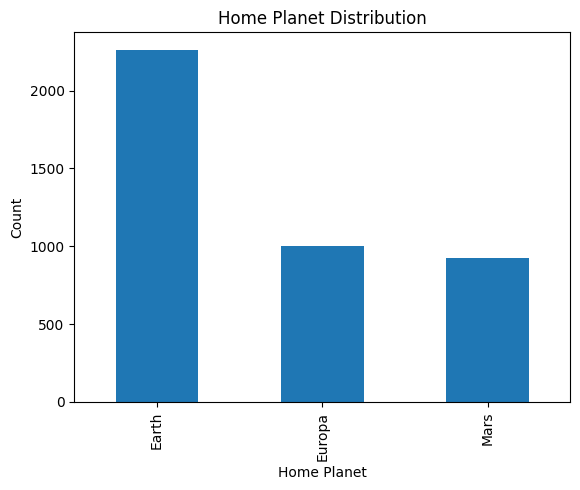

In [ ]:
# Home Planet
test_df['HomePlanet'].value_counts().plot(kind='bar', title='Home Planet Distribution')
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.show()


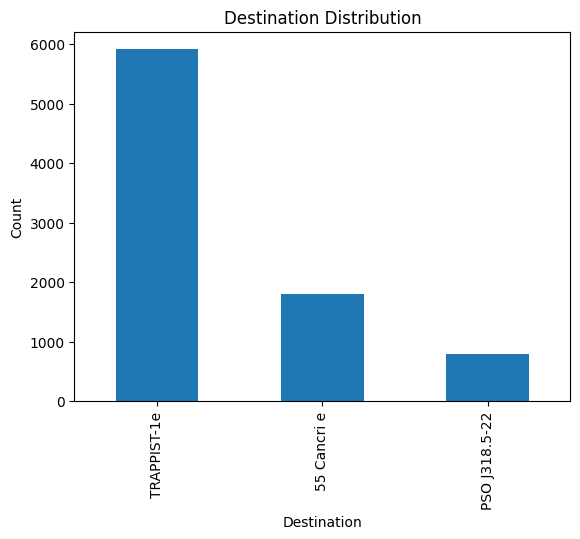

In [24]:
# Destination
test_df['Destination'].value_counts().plot(kind='bar', title='Destination Distribution')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()


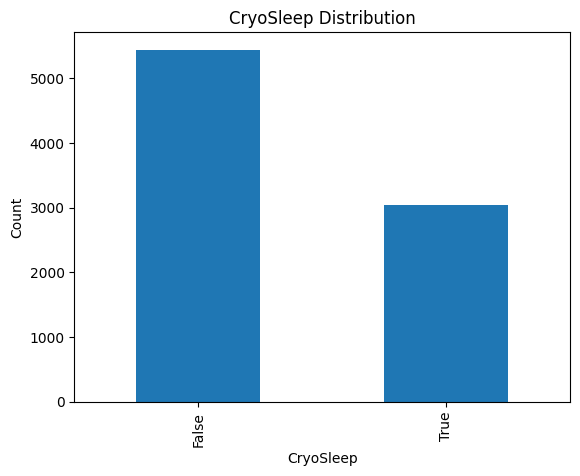

In [25]:
# Cryosleep
test_df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep Distribution')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()


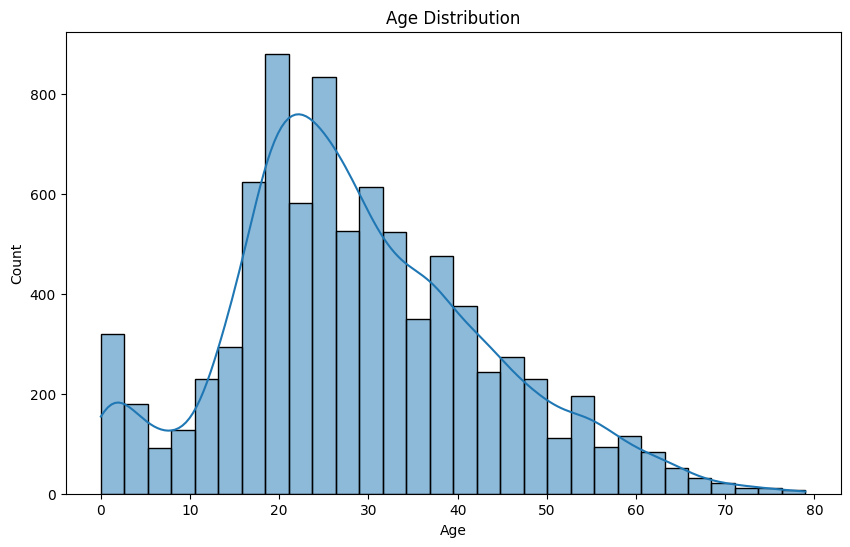

In [26]:
# Age
plt.figure(figsize=(10, 6))
sns.histplot(test_df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


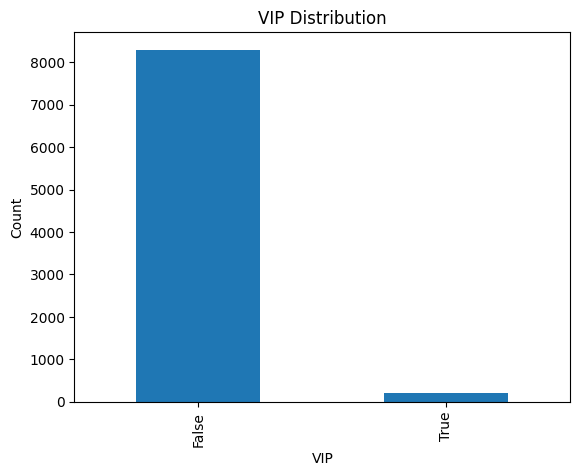

In [27]:
# VIP
test_df['VIP'].value_counts().plot(kind='bar', title='VIP Distribution')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.show()


Very large difference between VIP and non-VIP which could be insightful for prediction, but we will need to see what the proportions are before being able to make that decision. 

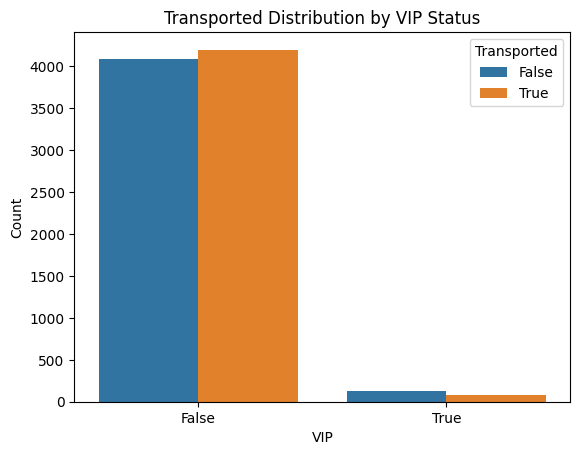

In [28]:
sns.countplot(data=test_df, x='VIP', hue='Transported')
plt.title('Transported Distribution by VIP Status')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.show()

It seems that VIP status does not really matter as both VIP and non-VIP members are near evenly split. 

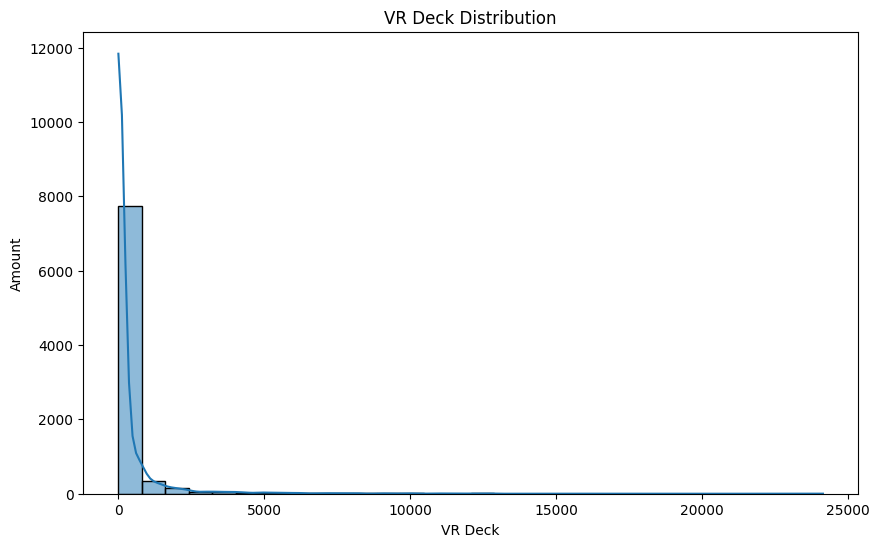

In [29]:
# VR Deck
plt.figure(figsize=(10, 6))
sns.histplot(test_df['VRDeck'].dropna(), bins=30, kde=True)
plt.title('VR Deck Distribution')
plt.xlabel('VR Deck')
plt.ylabel('Amount')
plt.show()


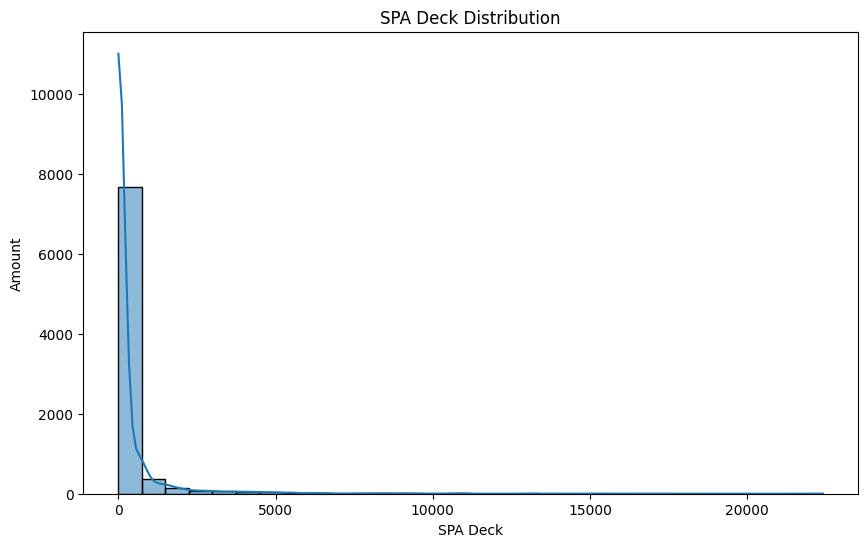

In [30]:
# SPA Deck
plt.figure(figsize=(10, 6))
sns.histplot(test_df['Spa'].dropna(), bins=30, kde=True)
plt.title('SPA Deck Distribution')
plt.xlabel('SPA Deck')
plt.ylabel('Amount')
plt.show()


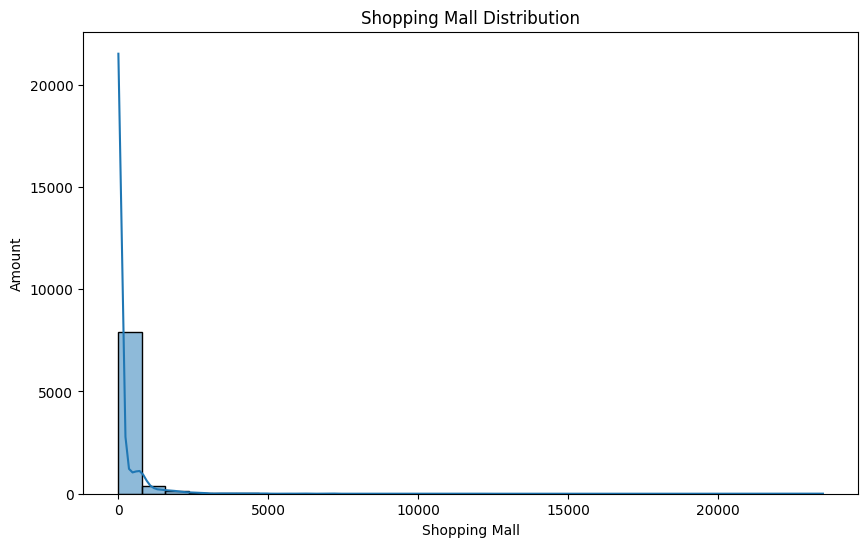

In [31]:
# Shopping Mall
plt.figure(figsize=(10, 6))
sns.histplot(test_df['ShoppingMall'].dropna(), bins=30, kde=True)
plt.title('Shopping Mall Distribution')
plt.xlabel('Shopping Mall')
plt.ylabel('Amount')
plt.show()

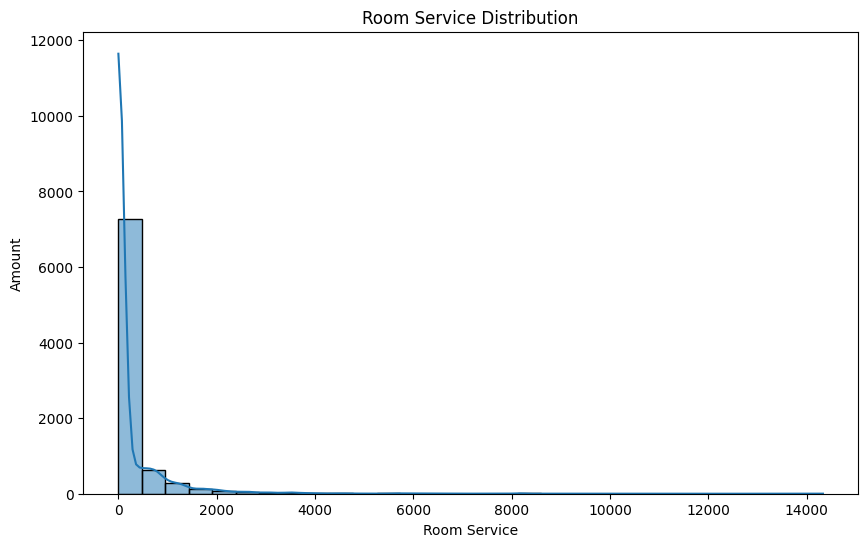

In [32]:
# Room Service
plt.figure(figsize=(10, 6))
sns.histplot(test_df['RoomService'].dropna(), bins=30, kde=True)
plt.title('Room Service Distribution')
plt.xlabel('Room Service')
plt.ylabel('Amount')
plt.show()


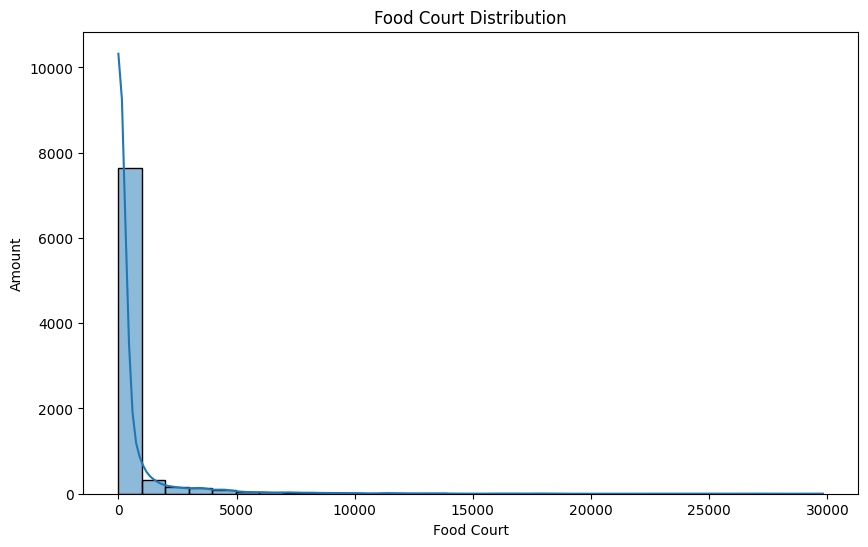

In [33]:
# Food Court
plt.figure(figsize=(10, 6))
sns.histplot(test_df['FoodCourt'].dropna(), bins=30, kde=True)
plt.title('Food Court Distribution')
plt.xlabel('Food Court')
plt.ylabel('Amount')
plt.show()


We will want to look at the breakdown of empty values by column to see where we are missing data and determine if it matters or not. 

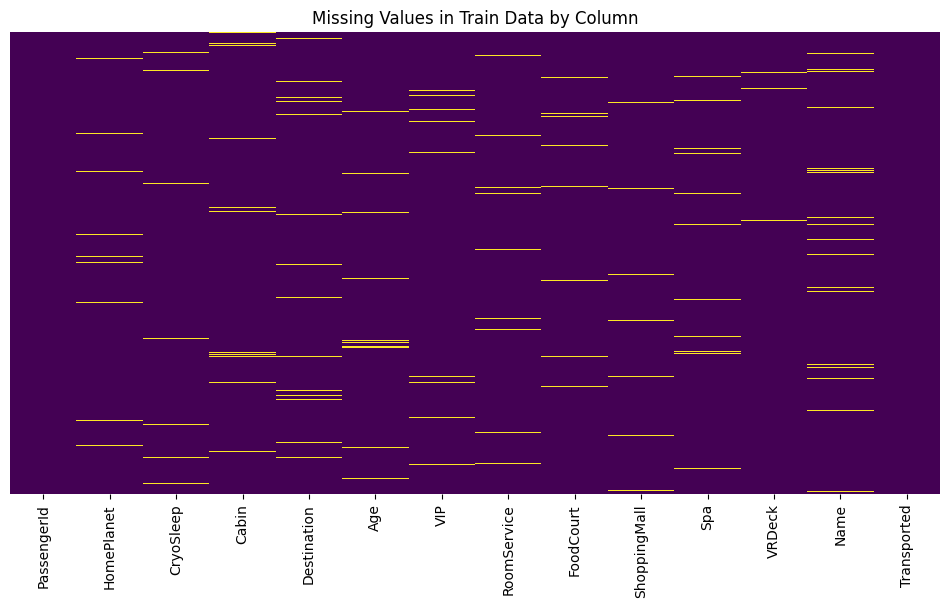

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(test_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Train Data by Column')
plt.show()


In [35]:
null_counts = test_df.isnull().sum()
null_percent = test_df.isnull().mean() * 100
null_summary = pd.DataFrame({'Count': null_counts, 'Percent': null_percent})
print(null_summary.sort_values(by='Percent', ascending=False))

              Count   Percent
CryoSleep       217  2.496261
ShoppingMall    208  2.392730
VIP             203  2.335212
HomePlanet      201  2.312205
Name            200  2.300702
Cabin           199  2.289198
VRDeck          188  2.162660
Spa             183  2.105142
FoodCourt       183  2.105142
Destination     182  2.093639
RoomService     181  2.082135
Age             179  2.059128
PassengerId       0  0.000000
Transported       0  0.000000


Since all of the missing data is under 3% of the column total, we will use imputation to deal with the missing values. 

For numerical data, I'll use column median values to help mitigate outliers. For categorical data, I'll utilize a separate 'missing' value to account for these- I'll plan to change the boolean columns to string while treating like booleans with a third category. In addition, for numerical values I will incorporate a new column called '${column}_is_missing'. 

In [36]:
test_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [40]:

num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in num_cols:
    median_val = test_df[col].median()

    test_df.fillna({col: median_val}, inplace=True)

    test_df[f"{col}_is_missing"] = test_df[col].isnull().astype(int)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,0,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,0,0,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,0,0,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,0,0,0


In [41]:
cat_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
test_df[cat_cols] = test_df[cat_cols].fillna('missing')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_is_missing,RoomService_is_missing,FoodCourt_is_missing,ShoppingMall_is_missing,Spa_is_missing,VRDeck_is_missing
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,0,0,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,0,0,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,0,0,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,0,0,0,0


## Feature Engineering

Having looked at distribution of values in the different columns and dealt with missing fields, I'm going to move into a phase of creating new lower-level features from the high-level features we already have. These lower-level features will be: 
* group number - from passenger id
* number_within_group - from passenger_id
* deck - from cabin 
* num - from cabin
* side - from cabin
* age groups - create buckets for different age ranges
* high spender - based on total spend per row
* spending group - based on total spend per row
* last_name - from name

These will give us more granularity in the data which could help our models pinpoint significance in predictibility. 